# Logistic Maps

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Define a function to evolve x to x_n
This function takes our initial conditions, evolves x to x_n for a specific r, and saves each evolution of x in an array

In [2]:
def x_npo_array(x_0, r, n):
    
    a = []
    i = 0
    
    while(i<n+2):
        if(i==0):
            x_npo = 4*r*x_0*(1 - x_0)
            x_n = x_npo
            a.append(x_n)
            i += 1

        elif(i<n+1):
            x_npo = 4*r*x_n*(1 - x_n)
            x_n = x_npo
            a.append(x_n)
            i += 1
            
        elif(i>=n+1):
            i+=1
             
    return(a)

## Define a function to evolve x to x_n for every r value
This function evolves an x_n for every value of r and saves it to an array

In [3]:
def x_npo_array_R_array(r_i,r_n,z):

    r = np.arange(r_i,r_n,z)
    b = []
    i = 0
    
    while(i<len(r)):
        a = x_npo_array(0.65, r[i] ,100)
        b.append(a)
        i += 1
        
        
    return b

## Define a function that records the nth evolution of x at every value of r

In [4]:
def x_nth_array(r_i,r_n,z,n):
    
    b = x_npo_array_R_array(r_i,r_n,z)
    r = np.arange(r_i,r_n,z)
    x_n = []
    i = 0
    
    while(i<len(r)):
        x_n.append(b[i][n])
        i += 1 
    
    return x_n

## Define a function that computes the Lyupanov exponent for a value r

In [5]:
def lyupanov(x,r): # l (L) is Lyupanov exponent
    
    ly=[]  #makes empty array to be filled with l values
    i = 0
    n = len(x)  # how many elements x
        
    while(i<n):   #n being the number of x values per r
        if(i==0):
            t = 4*r*(1-(2*x[i][0]))
            l_0 = 0.5*np.log(np.fabs(t))
            i += 1   #iterates
        
        elif(i<n-1):
            t = 4*r*(1-(2*x[i][0]))
            l = l_0 + 0.5*np.log(np.fabs(t))
            l_0 = l   #defines the new l as l_0 so that we can plug it in summation above.
                #gets the next x value with 
            i += 1 
        else:
            i += 1
        
        # find a way to return array with each l value for corresponding to each r
    return l_0

## Define a function that creates an array of Lyupanov values for every value of r

In [6]:
def r_loop():
    x = x_npo_array_R_array(0.7,1.0,.01)
    r = np.arange(0.7,1.0,.01)
    l_y = []
    i = 0 
    
    while(i<len(r)):
        l_y.append(lyupanov(x,r[i]))
        i += 1   
        
    return l_y

## Plotting r vs Lyupanov, and r vs all x iterations
(Trey's work)

Text(0.5, 1.07, 'l_y values')

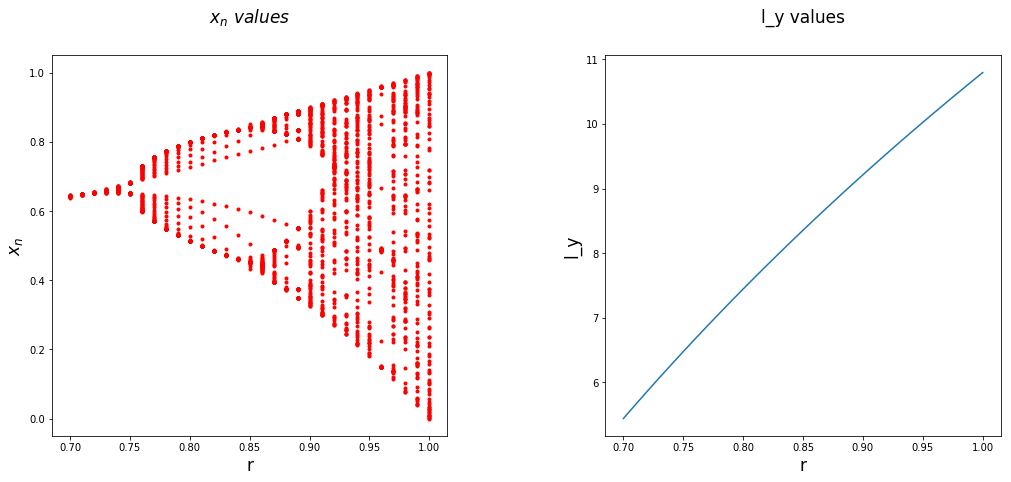

In [7]:
f, axarr = plt.subplots(1, 2)
f.subplots_adjust(wspace=0.4)
f.set_figheight(7)
f.set_figwidth(17)

b = x_npo_array_R_array(0.7,1.0,0.01)
i = 0

l_y = r_loop()
x_n = x_nth_array(0.7,1.0,0.01,100)
r = np.arange(0.7,1.0,0.01)

#first panel - x_npo
while(i<len(b[0])-1):
    axarr[0].plot(r[0:31],x_nth_array(0.7,1.0,0.01,i),'.',color='red')
    i += 1
axarr[0].set_xlabel('r', fontsize=17)
axarr[0].set_ylabel('$x_n$', fontsize=17)
axarr[0].set_title('$x_n\ values$', position=(0.5,1.07), fontsize=17)

#second panel - ly
axarr[1].plot(r, l_y)
axarr[1].set_xlabel('r', fontsize=17)
axarr[1].set_ylabel('l_y', fontsize=17)
axarr[1].set_title('l_y values',position=(0.5,1.07), fontsize=17)

## Playing with graphs of xn and n (can see bifercation here)

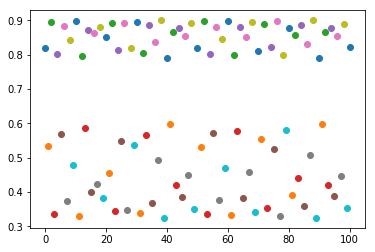

In [8]:
b = x_npo_array_R_array(.7,1.0,0.01)
i = 0
while(i<len(b[1])):
    x = i
    y = b[20][i]
    plt.plot(x,y,'o')
    i+=1

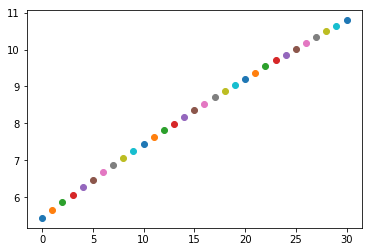

In [9]:
# l_y = r_loop()
i = 0
while(i<len(l_y)):
    x = i
    y = l_y[i]
    plt.plot(x,y,'o')
    i+=1

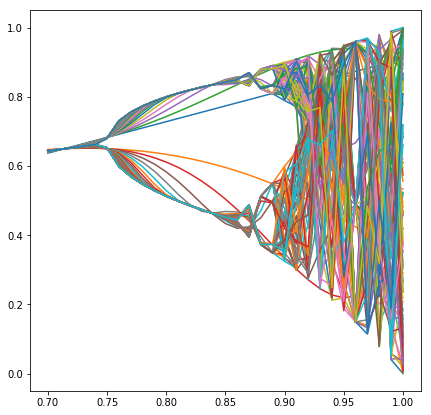

In [10]:
b = x_npo_array_R_array(.7,1.0,0.01)
fig = plt.figure(figsize=(7,7))
r = np.arange(0.7,1.00,.01)
plt.plot(r[0:31],b[0:1000])

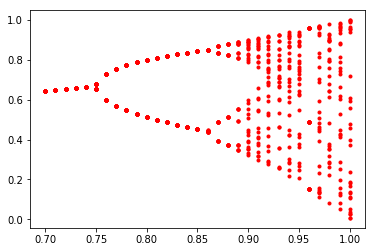

In [11]:
b = x_npo_array_R_array(0.7,1.0,0.01)
i = 0
r = np.arange(0.7,1.00,.01)

while(i+70<len(b[0])-1):
    plt.plot(r[0:31],x_nth_array(0.7,1.0,0.01,i+70),'.',color='red')
    i += 1
